<a href="https://colab.research.google.com/github/CarolBw/Mundo_Machine_Learn/blob/main/Dataset_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas

import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [2]:
# Carregar o dataset
wine = load_wine()

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Preparar a validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)


In [3]:
np.random.seed(42)

# Lista de modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Avaliação dos modelos
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")


KNN: 0.6886 (0.1380)
Decision Tree: 0.9295 (0.0838)
Naive Bayes: 0.9576 (0.0471)
SVM: 0.4295 (0.1070)


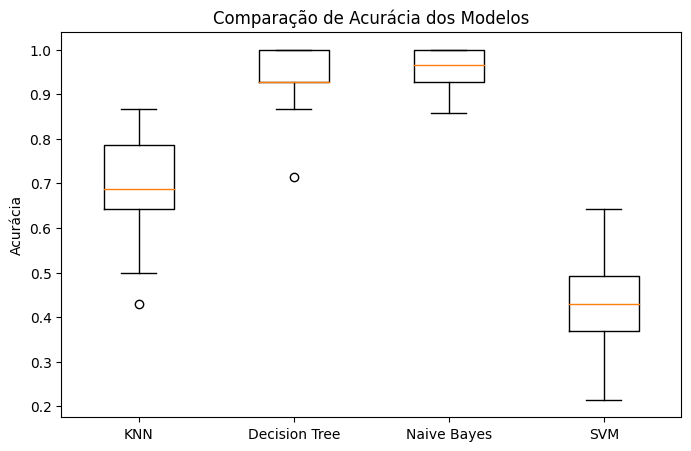

In [5]:
# Gráfico boxplot para comparar os modelos
plt.figure(figsize=(8,5))
plt.boxplot(results, labels=names)
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.show()


In [6]:
from sklearn.metrics import accuracy_score

# Dicionário para armazenar as acurácias de teste
test_accuracies = {}

for name, model in models:
    # Treinar o modelo com o conjunto de treino completo
    model.fit(X_train, y_train)
    # Previsão no conjunto de teste
    y_pred = model.predict(X_test)
    # Calcular a acurácia no conjunto de teste
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy:.4f}")


KNN Test Accuracy: 0.7222
Decision Tree Test Accuracy: 0.9444
Naive Bayes Test Accuracy: 1.0000
SVM Test Accuracy: 0.4444


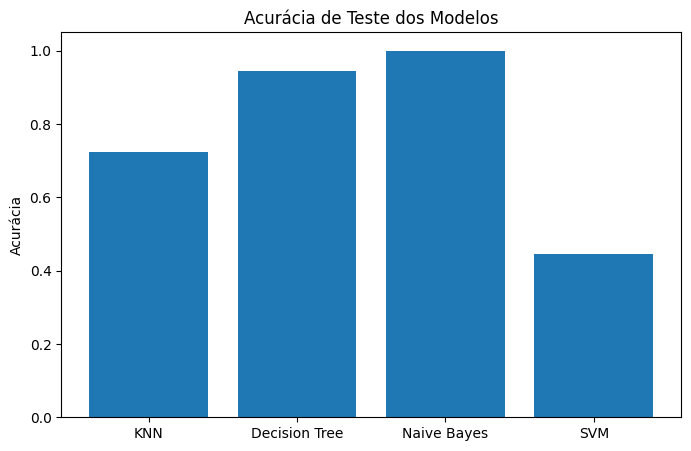

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(test_accuracies)), list(test_accuracies.values()), align='center')
plt.xticks(range(len(test_accuracies)), list(test_accuracies.keys()))
plt.title('Acurácia de Teste dos Modelos')
plt.ylabel('Acurácia')
plt.show()
